**1. Import the MNIST dataset.**

In [1]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Display the dataset shape
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


**2. Preprocessing the dataset**

In [3]:
# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Reshaped x_train shape: {x_train.shape}")
print(f"One-hot encoded y_train shape: {y_train.shape}")


Reshaped x_train shape: (60000, 28, 28, 1)
One-hot encoded y_train shape: (60000, 10)


**3. Data Partitioning**

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")


Training set shape: (48000, 28, 28, 1)
Validation set shape: (12000, 28, 28, 1)


**4. CNN Model**

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

**5. Choosing the appropriate Optimizer and learning rate**

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_val, y_val))


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.8480 - loss: 0.5002 - val_accuracy: 0.9785 - val_loss: 0.0720
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.9690 - loss: 0.1028 - val_accuracy: 0.9798 - val_loss: 0.0630
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 98ms/step - accuracy: 0.9779 - loss: 0.0712 - val_accuracy: 0.9882 - val_loss: 0.0387
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.9799 - loss: 0.0656 - val_accuracy: 0.9901 - val_loss: 0.0338
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.9830 - loss: 0.0540 - val_accuracy: 0.9912 - val_loss: 0.0326
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 88s 102ms/step - accuracy: 0.9843 - loss: 0.0493 - val_accuracy: 0.9895 - val_loss: 0.0325
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 76s 94ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9904 - val_loss: 0.0333
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.9876 - loss: 0.0412 

**6. Evaluate the model on test set**

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 3s - 10ms/step - accuracy: 0.9931 - loss: 0.0213
Test Accuracy: 0.9931


**7. Plot the Training and Validation Loss**

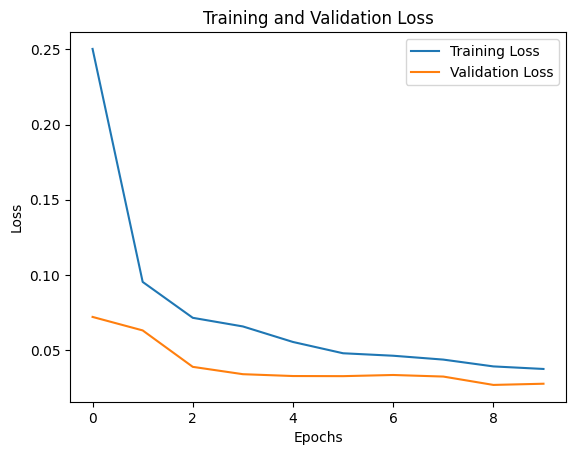

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**Batch Normalization:**

• In the MNIST dataset, inputs are images with pixel values. When training deep networks, activations can move away from stable ranges.This ensures activations remain in a stable range across layers.

• It reduces the training time and helps achieve better accuracy.

**Effect on Model Performance:**

Without Batch Normalization, the network may take longer to converge, and the gradients may become unstable during training.
In this model, BN helped in stabilizing the learning process and slightly improved validation accuracy.

**Dropout:**

• Dropout was introduced to prevent overfitting. The MNIST dataset, though relatively simple, can still lead to overfitting, especially as the model capacity increases.

• It makes sure that the model generalizes better to unseen data by reducing reliance on specific features.

**Effect on Model Performance:**

Without Dropout, the training accuracy might improve, but the validation accuracy could drop due to overfitting.
In this model, Dropout successfully reduced overfitting, improving the generalization on the test set(unseen data).

Therefore, the model requires both Batch Normalization and Dropout.